In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from pandas.io.json import json_normalize
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [3]:
coolcats_df = pd.read_csv("coolcats_data.csv", index_col=0)

In [4]:
coolcats_df

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,314979233,1,0.980,30236794.0,4668.0,6.0,Cool Cat #4668,0x08d816526bdc9d077dd685bd9fa49f58a5ab8e48,0x02c12f756584029777951ee8bd680d166c13748109c6...,12861162,138163984,2021-07-20T03:59:42,0xb7623e32ee90af7202bfabba05b006f1e997840ee031...,160,0xb47b29cda606cf7e7ed3672c8131eb8124ba3934
2021-07-20 04:03:27.737959,314988856,1,0.929,30242595.0,6744.0,1.0,Cool Cat #6744,0xb2a2a6a69e7a0ad66943f4c2869d45a9919cf740,0xf034b381780b69e8e40491a9ede4122db29b33a6a4bd...,12861173,138164672,2021-07-20T04:03:07,0x8fd25c0aba4ba0c4fea3de1d19fa1d598ad7c619280e...,79,0x44167790aa6c787fffee17aba51bf55b46c38d06
2021-07-20 04:12:51.292764,315014075,1,0.990,30234313.0,3856.0,6.0,Cool Cat #3856,0x8c2e56d181465f69c419dcd8760f2ade6372cc8b,0xbf906cf47b266eb984d35e28f251de696b9478cd576f...,12861209,138166889,2021-07-20T04:12:22,0xc35e6807b867b2f060d99de85662c41f760712412275...,94,0xf70a16287894d64d380458be2754d9c1f8296bf6
2021-07-20 04:13:29.909525,315015896,1,0.900,30246238.0,8611.0,3.0,Cool Cat #8611,0xb697b9455eeee9574ec5c5350cb10c8a5b752a39,0x681b0674b057e132a1ad8d8ee683e3fb349752b8f688...,12861213,138167162,2021-07-20T04:13:05,0x8987265089f680cd0ec4ab1803a6ac592eeadacd13f8...,161,0x7cc220c499162856eceeba2b1c33277455a3cfb7
2021-07-20 04:15:36.898508,315021013,1,0.860,30229327.0,3004.0,4.0,Cool Cat #3004,0x6e63a4caeccb4f341ee9c9175c9cc554bdb6d10b,0xa4c290e58186a8edabf1b03a77310f1c337241a6883d...,12861219,138167576,2021-07-20T04:14:54,0xd8542f5f5d08ce23b300c52c0fca2a16c57059297233...,259,0xa1cbb86803090bb85a45321d4eb9848ab755363a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,1497441142,1,8.000,30244830.0,7790.0,2.0,Cool Cat #7790,0x3f304c6721f35ff9af00fd32650c8e0a982180ab,0x384b371f0d5bdc524a6c922892eed8676503e67e5ee2...,13469899,186282723,2021-10-22T21:41:44,0x8a4557fcf5308a2ce403b79196171d18ef84ea123a53...,356,0xab0bfcafa3d6ec73344f195e98695965cd55f9ad
2021-10-22 21:58:06.614580,1497656848,1,8.500,30244561.0,7698.0,6.0,Cool Cat #7698,0x83b70d7cb2c902f15cc8b38b7aac3e3831d489fc,0xbe76cb44a080bdde48fd4f55ba7451a21809de0647e8...,13469968,186289421,2021-10-22T21:57:36,0xd88488c02ca72495c0388b946f4fc7cd70799ebca4c5...,167,0xce899baf2bec0a66222dc7389614e711e9858580
2021-10-22 22:09:51.133094,1497817034,1,9.600,30243627.0,7227.0,3.0,Cool Cat #7227,0x3fb9bdda993aafca06a054231f14be520786a69a,0x5eca2a47427d0b9c9d5cec68fd000fc6569bf4e392c8...,13470006,186293565,2021-10-22T22:07:24,0x18959227670c9d91f3f59d1fd6cc3a13c5ac8675f63c...,94,0x38a4d889a1979133fbc1d58f970f0953e3715c26


<AxesSubplot:xlabel='created_date'>

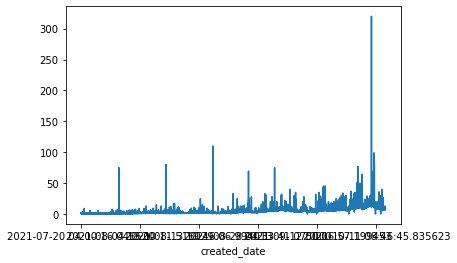

In [5]:
#basic plot function to peep data with no sampling
coolcats_df["total_price_eth"].plot()

The imported CSV needs to be converted to a time series and re-indexed by date again. Let's do this quickly.

In [6]:
coolcats_df.index = pd.to_datetime(coolcats_df.index)


In [7]:
coolcats_df.index

DatetimeIndex(['2021-07-20 04:00:16.046520', '2021-07-20 04:03:27.737959',
               '2021-07-20 04:12:51.292764', '2021-07-20 04:13:29.909525',
               '2021-07-20 04:15:36.898508', '2021-07-20 04:16:54.498247',
               '2021-07-20 04:18:41.559872', '2021-07-20 04:19:02.531511',
               '2021-07-20 04:20:54.626061', '2021-07-20 04:21:43.870821',
               ...
               '2021-10-22 19:24:40.289438', '2021-10-22 19:29:11.447268',
               '2021-10-22 20:25:35.338635', '2021-10-22 20:32:53.337100',
               '2021-10-22 21:39:46.672041', '2021-10-22 21:42:21.243043',
               '2021-10-22 21:58:06.614580', '2021-10-22 22:09:51.133094',
               '2021-10-22 22:46:39.290488', '2021-10-22 23:06:06.671899'],
              dtype='datetime64[ns]', name='created_date', length=10303, freq=None)

<AxesSubplot:xlabel='created_date'>

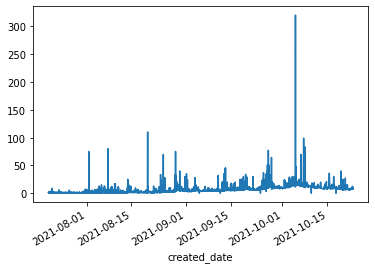

In [18]:
#basic plot function to peep data with no sampling
coolcats_df["total_price_eth"].plot()

In [16]:
#are sales higher at a certain hour?



In [8]:
coolcats_df_viz = coolcats_df

In [9]:
coolcats_df_viz["year"] = coolcats_df_viz.index.year
coolcats_df_viz["month"] = coolcats_df_viz.index.month
coolcats_df_viz["hour"] = coolcats_df_viz.index.hour
coolcats_df_viz["weekday"] = coolcats_df_viz.index.day_name()

In [10]:
coolcats_df_viz

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address,year,month,hour,weekday
created_date,,,,,,,,,,,,,,,,,,,
2021-07-20 04:00:16.046520,314979233,1,0.980,30236794.0,4668.0,6.0,Cool Cat #4668,0x08d816526bdc9d077dd685bd9fa49f58a5ab8e48,0x02c12f756584029777951ee8bd680d166c13748109c6...,12861162,138163984,2021-07-20T03:59:42,0xb7623e32ee90af7202bfabba05b006f1e997840ee031...,160,0xb47b29cda606cf7e7ed3672c8131eb8124ba3934,2021,7,4,Tuesday
2021-07-20 04:03:27.737959,314988856,1,0.929,30242595.0,6744.0,1.0,Cool Cat #6744,0xb2a2a6a69e7a0ad66943f4c2869d45a9919cf740,0xf034b381780b69e8e40491a9ede4122db29b33a6a4bd...,12861173,138164672,2021-07-20T04:03:07,0x8fd25c0aba4ba0c4fea3de1d19fa1d598ad7c619280e...,79,0x44167790aa6c787fffee17aba51bf55b46c38d06,2021,7,4,Tuesday
2021-07-20 04:12:51.292764,315014075,1,0.990,30234313.0,3856.0,6.0,Cool Cat #3856,0x8c2e56d181465f69c419dcd8760f2ade6372cc8b,0xbf906cf47b266eb984d35e28f251de696b9478cd576f...,12861209,138166889,2021-07-20T04:12:22,0xc35e6807b867b2f060d99de85662c41f760712412275...,94,0xf70a16287894d64d380458be2754d9c1f8296bf6,2021,7,4,Tuesday
2021-07-20 04:13:29.909525,315015896,1,0.900,30246238.0,8611.0,3.0,Cool Cat #8611,0xb697b9455eeee9574ec5c5350cb10c8a5b752a39,0x681b0674b057e132a1ad8d8ee683e3fb349752b8f688...,12861213,138167162,2021-07-20T04:13:05,0x8987265089f680cd0ec4ab1803a6ac592eeadacd13f8...,161,0x7cc220c499162856eceeba2b1c33277455a3cfb7,2021,7,4,Tuesday
2021-07-20 04:15:36.898508,315021013,1,0.860,30229327.0,3004.0,4.0,Cool Cat #3004,0x6e63a4caeccb4f341ee9c9175c9cc554bdb6d10b,0xa4c290e58186a8edabf1b03a77310f1c337241a6883d...,12861219,138167576,2021-07-20T04:14:54,0xd8542f5f5d08ce23b300c52c0fca2a16c57059297233...,259,0xa1cbb86803090bb85a45321d4eb9848ab755363a,2021,7,4,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22 21:42:21.243043,1497441142,1,8.000,30244830.0,7790.0,2.0,Cool Cat #7790,0x3f304c6721f35ff9af00fd32650c8e0a982180ab,0x384b371f0d5bdc524a6c922892eed8676503e67e5ee2...,13469899,186282723,2021-10-22T21:41:44,0x8a4557fcf5308a2ce403b79196171d18ef84ea123a53...,356,0xab0bfcafa3d6ec73344f195e98695965cd55f9ad,2021,10,21,Friday
2021-10-22 21:58:06.614580,1497656848,1,8.500,30244561.0,7698.0,6.0,Cool Cat #7698,0x83b70d7cb2c902f15cc8b38b7aac3e3831d489fc,0xbe76cb44a080bdde48fd4f55ba7451a21809de0647e8...,13469968,186289421,2021-10-22T21:57:36,0xd88488c02ca72495c0388b946f4fc7cd70799ebca4c5...,167,0xce899baf2bec0a66222dc7389614e711e9858580,2021,10,21,Friday
2021-10-22 22:09:51.133094,1497817034,1,9.600,30243627.0,7227.0,3.0,Cool Cat #7227,0x3fb9bdda993aafca06a054231f14be520786a69a,0x5eca2a47427d0b9c9d5cec68fd000fc6569bf4e392c8...,13470006,186293565,2021-10-22T22:07:24,0x18959227670c9d91f3f59d1fd6cc3a13c5ac8675f63c...,94,0x38a4d889a1979133fbc1d58f970f0953e3715c26,2021,10,22,Friday


In [31]:
#lets plot this data a few different ways to get an understanding of what drives sales volume 

In [11]:
weekdays = coolcats_df_viz["weekday"].value_counts()

<AxesSubplot:ylabel='weekday'>

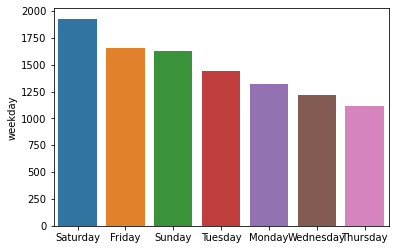

In [12]:
fig, ax = plt.subplots()

x = weekdays.index
y = weekdays
sns.barplot(x=x, y=y)

We can see that the most sales transactions for this collection happen over the weekend days. What about hourly?

In [13]:
hourcounts = coolcats_df_viz["hour"].value_counts()

<AxesSubplot:ylabel='hour'>

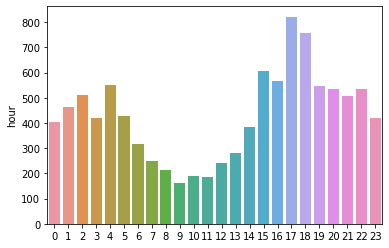

In [14]:
fig, ax = plt.subplots()

x = hourcounts.index
y = hourcounts
sns.barplot(x=x, y=y)

In [15]:
hourcounts.sort_values(ascending=False)

17    822
18    758
15    605
16    568
4     550
19    548
22    534
20    534
2     511
21    509
1     465
5     428
3     421
23    420
0     406
14    386
6     317
13    283
7     249
12    243
8     213
10    188
11    185
9     160
Name: hour, dtype: int64

There appears to be significantly higher sales volume during the later hours of the day, so considering the hour of the sale may be essential to our predictions.

In [17]:
coolcatshourly = coolcats_df_viz["id"].resample('H').count()

In [18]:
coolcatshourly [:20]

created_date
2021-07-20 04:00:00    21
2021-07-20 05:00:00     7
2021-07-20 06:00:00     3
2021-07-20 07:00:00     2
2021-07-20 08:00:00     3
2021-07-20 09:00:00     2
2021-07-20 10:00:00     3
2021-07-20 11:00:00     3
2021-07-20 12:00:00     2
2021-07-20 13:00:00     3
2021-07-20 14:00:00     0
2021-07-20 15:00:00     3
2021-07-20 16:00:00     2
2021-07-20 17:00:00     4
2021-07-20 18:00:00     6
2021-07-20 19:00:00    10
2021-07-20 20:00:00     4
2021-07-20 21:00:00     5
2021-07-20 22:00:00     3
2021-07-20 23:00:00     6
Freq: H, Name: id, dtype: int64

<AxesSubplot:xlabel='created_date'>

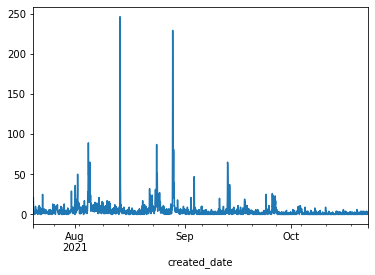

In [20]:
coolcatshourly.plot()

I want to see if this cyclical looking pattern in our data is synonymous with the movement of Ethereum closing prices per day. I downloaded historical data from Yahoo Finance for ETH prices for the same dates as my Cool Cats data.

In [21]:
yahoo_eth = pd.read_csv("ETH-USD.csv")

In [22]:
yahoo_eth

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-20,1819.082031,1836.998047,1722.050781,1787.510742,1787.510742,17368597636
1,2021-07-21,1786.276245,2025.680420,1759.023315,1990.970825,1990.970825,21253359756
2,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,17495480331
3,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,16200392492
4,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,16057446601
...,...,...,...,...,...,...,...
60,2021-09-18,3397.422852,3540.807617,3371.892334,3432.018311,3432.018311,15995220233
61,2021-09-19,3433.287842,3448.322021,3286.172363,3329.447998,3329.447998,14257609743
62,2021-09-20,3329.670654,3343.325439,2940.839111,2958.993408,2958.993408,27371684581
63,2021-09-21,2977.310547,3101.697510,2676.407471,2764.431152,2764.431152,30405062665


In [23]:
yahoo_eth["Date"] = pd.to_datetime(yahoo_eth["Date"])

In [24]:
yahoo_eth.set_index("Date", inplace=True)

In [25]:
yahoo_eth

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-20,1819.082031,1836.998047,1722.050781,1787.510742,1787.510742,17368597636
2021-07-21,1786.276245,2025.680420,1759.023315,1990.970825,1990.970825,21253359756
2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,2025.202759,17495480331
2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,2124.776611,16200392492
2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,2189.218750,16057446601
...,...,...,...,...,...,...
2021-09-18,3397.422852,3540.807617,3371.892334,3432.018311,3432.018311,15995220233
2021-09-19,3433.287842,3448.322021,3286.172363,3329.447998,3329.447998,14257609743
2021-09-20,3329.670654,3343.325439,2940.839111,2958.993408,2958.993408,27371684581


<AxesSubplot:xlabel='created_date'>

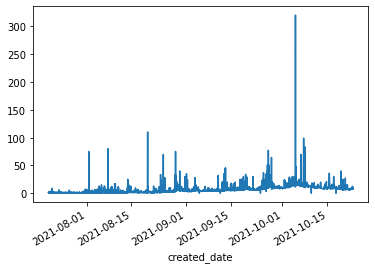

In [26]:
coolcats_df["total_price_eth"].plot()

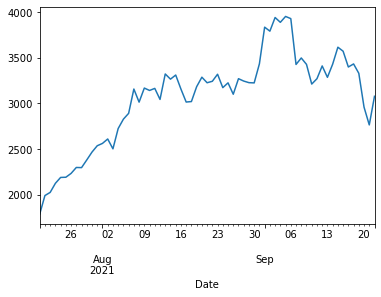

In [27]:
closingprice = yahoo_eth["Close"].plot()

In [70]:
coolcatsdaily = coolcats_df_viz.resample('D').mean()

In [ ]:
yahoo_eth["Close"].plot()

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

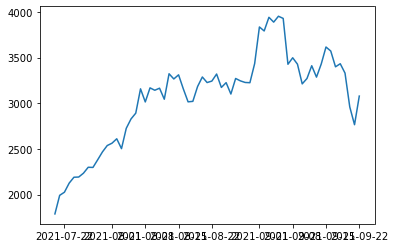

In [82]:
# FIGURE OUT HOW TO MAKE THIS WORK...
plt.plot(yahoo_eth["Close"])
plt.plot(dailycc)

Need to begin removing the trend and build model on stationarized data

In [29]:
cc_ts = coolcats_df["total_price_eth"]

<AxesSubplot:xlabel='created_date'>

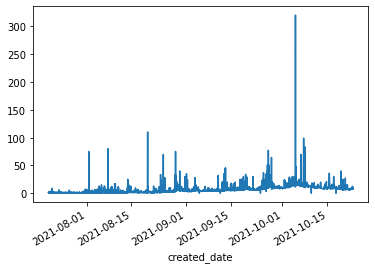

In [30]:
cc_ts.plot()

In [31]:
stattest = adfuller(cc_ts)

In [32]:
display(stattest)

(-3.254153578333129,
 0.017056393420587807,
 39,
 10263,
 {'1%': -3.430987331807296,
  '5%': -2.861821663541857,
  '10%': -2.5669199243595098},
 60717.743054514416)

The p value is pretty low at .01, where the significance level standard typically is .05.

### possibly use this code later to level up stationarity but not at this moment because our data is already pretty stationary 

In [44]:
diff_cc = cc_ts.diff().dropna()

In [45]:
adfuller(diff_cc)


(-26.936637967258648,
 0.0,
 39,
 10262,
 {'1%': -3.4309873939288447,
  '5%': -2.8618216909930183,
  '10%': -2.5669199389717714},
 60720.44311788704)

This is completely stationary at this point but I need to ask instructors if i NEED to downsample?? I am going to try modeling on the hourly downsampled for now.

<AxesSubplot:xlabel='created_date'>

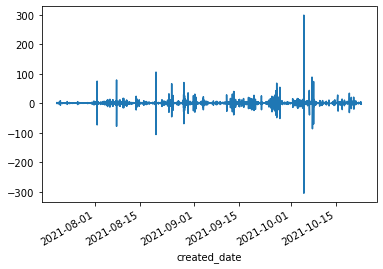

In [46]:
diff_cc.plot()

### end temp code

### begin modeling process

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
cc_hourly = coolcats_df_viz["total_price_eth"].resample('H').mean()

In [37]:
cc_hourly.dropna(inplace=True)

<AxesSubplot:xlabel='created_date'>

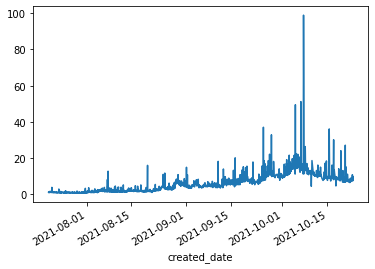

In [38]:
cc_hourly.plot()

In [39]:
adfuller(cc_hourly)

(-1.5854691040260933,
 0.49088863906493346,
 22,
 1846,
 {'1%': -3.4338973545418083,
  '5%': -2.8631069584819104,
  '10%': -2.5676041937532355},
 9316.355578597351)

In [40]:
diff_cc_hourly = cc_hourly.diff().dropna()

<AxesSubplot:xlabel='created_date'>

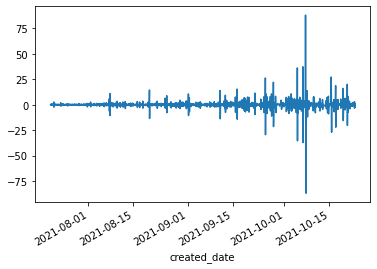

In [41]:
diff_cc_hourly.plot()

In [42]:
adfuller(diff_cc_hourly)

(-10.758234193843359,
 2.5601979500943136e-19,
 25,
 1842,
 {'1%': -3.4339050685840564,
  '5%': -2.8631103639464617,
  '10%': -2.56760600704281},
 9311.673118534185)

In [43]:
len(diff_cc_hourly)

1868

In [47]:
### create a baseline

In [ ]:
diff_cc_hourly

In [69]:
# find the index which allows us to split off 20% of the data
cutoff = round(diff_cc_hourly.shape[0]*0.8)
cutoff

1494

In [70]:
train = diff_cc_hourly[:cutoff]

test = diff_cc_hourly[cutoff:]

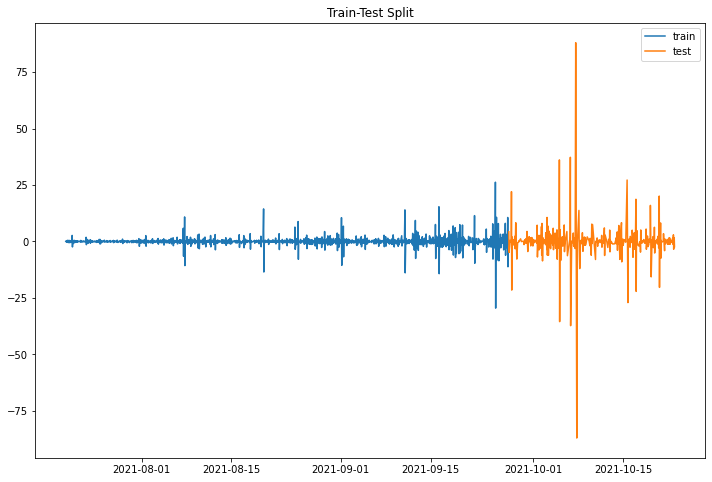

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [72]:
train

created_date
2021-07-20 05:00:00     0.077333
2021-07-20 06:00:00     0.017714
2021-07-20 07:00:00    -0.205000
2021-07-20 08:00:00     0.088333
2021-07-20 09:00:00    -0.218333
                         ...    
2021-09-26 23:00:00    -0.811072
2021-09-27 00:00:00    10.625001
2021-09-27 01:00:00   -11.200334
2021-09-27 02:00:00     0.808667
2021-09-27 03:00:00    -0.090774
Name: total_price_eth, Length: 1494, dtype: float64

The ARIMA model will turn these back into relevant price predictions when we specify the "levels" type (since differencing impacted the numbers). 

In [73]:
adfuller(diff_cc_hourly)

(-10.758234193843359,
 2.5601979500943136e-19,
 25,
 1842,
 {'1%': -3.4339050685840564,
  '5%': -2.8631103639464617,
  '10%': -2.56760600704281},
 9311.673118534185)

Begin Baseline

In [74]:
naivebaseline = train.shift(1)

In [75]:
naivebaseline

created_date
2021-07-20 05:00:00          NaN
2021-07-20 06:00:00     0.077333
2021-07-20 07:00:00     0.017714
2021-07-20 08:00:00    -0.205000
2021-07-20 09:00:00     0.088333
                         ...    
2021-09-26 23:00:00    -2.808452
2021-09-27 00:00:00    -0.811072
2021-09-27 01:00:00    10.625001
2021-09-27 02:00:00   -11.200334
2021-09-27 03:00:00     0.808667
Name: total_price_eth, Length: 1494, dtype: float64

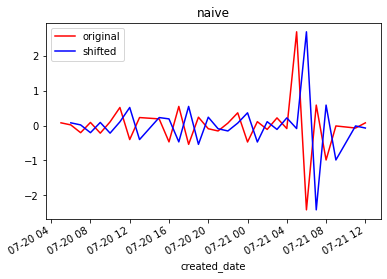

In [76]:
fig, ax = plt.subplots()

train[0:30].plot(ax=ax, c='r', label='original')
naivebaseline[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

Baseline RMSE :

In [77]:
np.sqrt(mean_squared_error(train[1:], naivebaseline.dropna()))

3.6990576307400325

In [78]:
ar_1 = ARIMA(train, order=(1, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar_1.predict(typ='levels')

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


created_date
2021-07-20 05:00:00    0.000000
2021-07-20 06:00:00    0.077333
2021-07-20 07:00:00    0.057300
2021-07-20 08:00:00   -0.057121
2021-07-20 09:00:00   -0.106435
                         ...   
2021-09-26 23:00:00    0.412366
2021-09-27 00:00:00   -2.137299
2021-09-27 01:00:00    3.031641
2021-09-27 02:00:00    3.291320
2021-09-27 03:00:00   -7.165107
Name: predicted_mean, Length: 1494, dtype: float64

In [79]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        total_price_eth   No. Observations:                 1494
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3636.955
Date:                Sun, 28 Nov 2021   AIC                           7277.910
Time:                        16:54:18   BIC                           7288.527
Sample:                             0   HQIC                          7281.866
                               - 1494                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6640      0.007    -99.064      0.000      -0.677      -0.651
sigma2         7.6426      0.071    107.289      0.000       7.503       7.782
===================================================================================
Ljung-Box (L1) (Q):                 144.67   Jarque-Bera (JB):            126537.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.53   Skew:                            -1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
#coefficient indicates a negative relationship is in effect in this model between last week and next week

In [81]:
random_walk_1 = ARIMA(train, order=(0, 1, 0)).fit() #just specifying a first difference, and evaluate model performance

random_walk_1.summary()

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        total_price_eth   No. Observations:                 1494
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4071.436
Date:                Sun, 28 Nov 2021   AIC                           8144.872
Time:                        21:00:46   BIC                           8150.180
Sample:                             0   HQIC                          8146.850
                               - 1494                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        13.6830      0.097    140.376      0.000      13.492      13.874
===================================================================================
Ljung-Box (L1) (Q):                 660.39   Jarque-Bera (JB):            163207.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.74   Skew:                            -3.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
#compare AIC scores of random walk model versus first ARIMA model

print(f"Random walk:  {random_walk_1.aic}")
print(f"ARIMA 1:  {ar_1.aic}")

Random walk:  8144.871645301371
ARIMA 1:  7277.910014209485
